In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


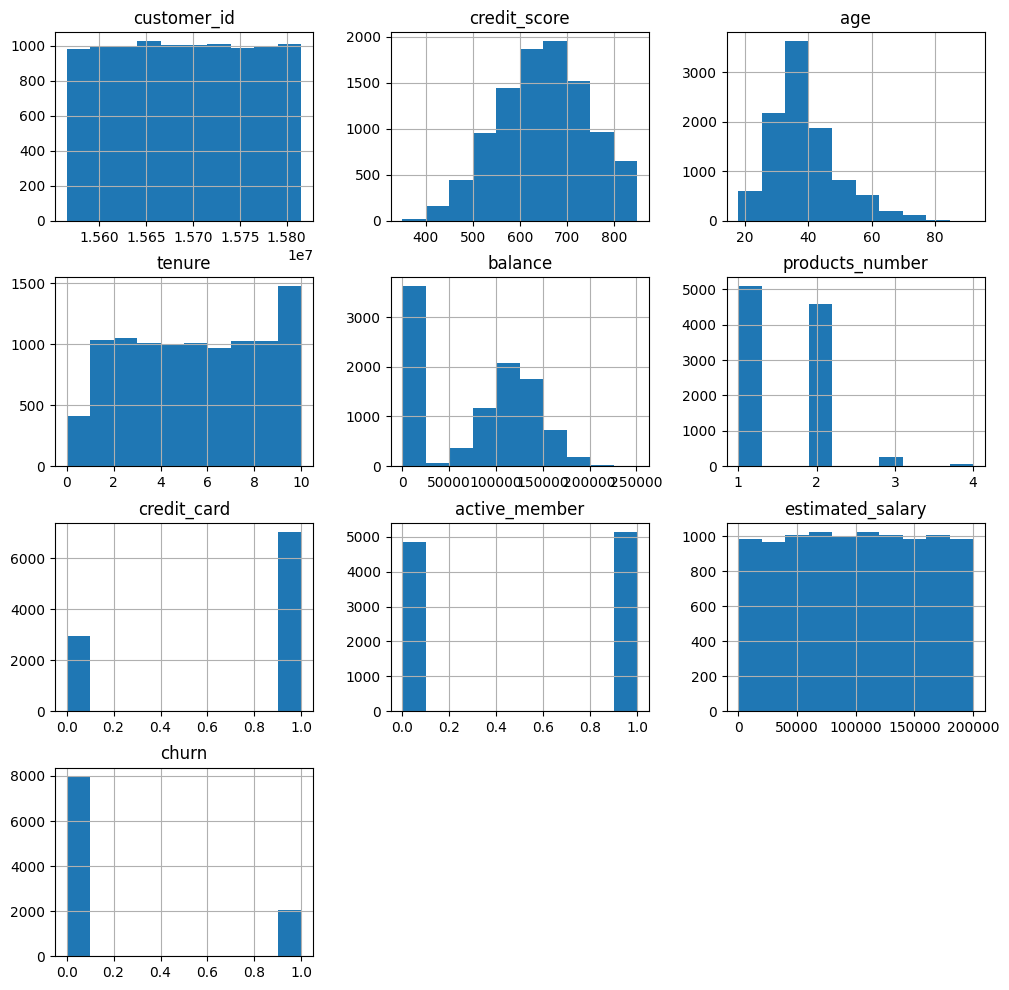

In [6]:
plot = df.hist(figsize=(12,12))

Handling missing values

In [7]:
df = pd.get_dummies(df,columns=['country','gender'])

In [8]:
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [9]:
df.isnull().sum()

customer_id         0
credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
country_France      0
country_Germany     0
country_Spain       0
gender_Female       0
gender_Male         0
dtype: int64

In [10]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [11]:
X = df.drop(columns=['churn'])
y = df['churn']

Oversampling the minority class

In [54]:
from imblearn.over_sampling import RandomOverSampler

rs = RandomOverSampler()

X, y = rs.fit_resample(X,y)

In [55]:
y.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

Model building

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

print('Train set score',rf.score(X_train, y_train))
print('Test set score',rf.score(X_test, y_test))

Train set score 1.0
Test set score 0.9487694625816173


In [58]:
from xgboost import XGBClassifier

xg = XGBClassifier()

xg.fit(X_train, y_train)

print('Train set score',xg.score(X_train, y_train))
print('Test set score',xg.score(X_test, y_test))

Train set score 0.9637474882786337
Test set score 0.8990457056755399


In [59]:
models = [rf, xg]
model_names = ['Random Forest', 'xgboost']
i=0
for model in models:
    cv = KFold()

    scores = cross_val_score(model, X, y, cv=cv)

    print(model_names[i])
    print('Cross Validation scores', scores)
    print("Average CV score: {:.3f}".format(scores.mean()))
    i=i+1

Random Forest
Cross Validation scores [0.91776522 0.91428571 0.92244898 0.98869702 1.        ]
Average CV score: 0.949
xgboost
Cross Validation scores [0.85875706 0.85306122 0.85682889 0.90486656 0.89544741]
Average CV score: 0.874


In [37]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1977
           1       0.92      0.98      0.95      2005

    accuracy                           0.94      3982
   macro avg       0.95      0.94      0.94      3982
weighted avg       0.95      0.94      0.94      3982



Feature Importances

In [66]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
2,age,0.233
5,products_number,0.129
4,balance,0.121
0,customer_id,0.113
8,estimated_salary,0.113
1,credit_score,0.109
3,tenure,0.068
7,active_member,0.036
10,country_Germany,0.022
6,credit_card,0.015


In [38]:
import tensorflow as tf
from tensorflow import keras

In [68]:
ANN = keras.Sequential([
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(40, activation='relu'),

    keras.layers.Dense(1, activation='sigmoid')
])

In [69]:
ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
ANN.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=30)

Epoch 1/30
374/374 [==============================] - 2s 2ms/step - loss: 64989.1562 - accuracy: 0.4991 - val_loss: 2753.1685 - val_accuracy: 0.4985
Epoch 2/30
374/374 [==============================] - 1s 2ms/step - loss: 9555.8438 - accuracy: 0.4973 - val_loss: 1424.9495 - val_accuracy: 0.5015
Epoch 3/30
374/374 [==============================] - 1s 2ms/step - loss: 4598.8384 - accuracy: 0.4895 - val_loss: 905.7963 - val_accuracy: 0.4985
Epoch 4/30
374/374 [==============================] - 1s 2ms/step - loss: 2508.9255 - accuracy: 0.4990 - val_loss: 246.1993 - val_accuracy: 0.5015
Epoch 5/30
374/374 [==============================] - 1s 2ms/step - loss: 1701.3751 - accuracy: 0.4962 - val_loss: 834.3924 - val_accuracy: 0.4985
Epoch 6/30
374/374 [==============================] - 1s 2ms/step - loss: 1029.2170 - accuracy: 0.4958 - val_loss: 199.3458 - val_accuracy: 0.5015
Epoch 7/30
374/374 [==============================] - 1s 2ms/step - loss: 658.3546 - accuracy: 0.5021 - val_loss: 5

In [71]:
ANN.evaluate(X_test, y_test)

125/125 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4985


[0.6932544708251953, 0.4984932243824005]